# 🛒 __Retail Sales__

# __Dataset__

**About**

The [Retail Sales](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset) and Customer Demographics Dataset! This synthetic dataset has been meticulously crafted to simulate a dynamic retail environment, providing an ideal playground for those eager to sharpen their data analysis skills through exploratory data analysis (EDA).

**Overview:**

This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as:

__1. Transaction ID:__ A unique identifier for each transaction, allowing tracking and reference.

__2. Date:__ The date when the transaction occurred, providing insights into sales trends over time.

__3. Customer ID:__ A unique identifier for each customer, enabling customer-centric analysis.

__4.Gender:__ The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

__5.Age:__ The age of the customer, facilitating segmentation and exploration of age-related influences.

__6.Product Category:__ The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

__7.Quantity:__ The number of units of the product purchased, contributing to insights on purchase volumes.

__8.Price per Unit:__ The price of one unit of the product, aiding in calculations related to total spending.

__9.Total Amount:__ The total monetary value of the transaction, showcasing the financial impact of each purchase.

These attributes enable a multifaceted exploration of sales trends, demographic influences, and purchasing behaviors.


**Questions to answers:**

- How does customer age and gender influence their purchasing behavior?

- Are there discernible patterns in sales across different time periods?

- Which product categories hold the highest appeal among customers?

- What are the relationships between age, spending, and product preferences?

- How do customers adapt their shopping habits during seasonal trends?

- Are there distinct purchasing behaviors based on the number of items bought per transaction?

- What insights can be gleaned from the distribution of product prices within each category?

# __Import Libraries__

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### __Basic Steps__

In [38]:
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [39]:
df.shape

(1000, 9)

In [40]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [42]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [43]:
# uniques values of the dataset
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [44]:
# numerical columns
numerical_data = df.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)
# categorical columns
categorical_data = df.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Numerical columns:  Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')
Categorical columns:  Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


In [45]:
# checking null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## __Adding month column__

In [46]:
# seeing the date column
df['Date'] = pd.to_datetime(df['Date'])
# add 'month' column and extract month from date
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

In [47]:
print("New Shap of df: ",df.shape)
print("Columns of df: ",df.columns)

New Shap of df:  (1000, 10)
Columns of df:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')


## __Handling Outliers__

In [48]:
df = df[df['Total Amount'] >= df['Price per Unit']]
print(df.shape)
# no outliers present

(1000, 10)


## __Observation 1__

By using the basic steps we observe:

1. Total entities in the data is `1000` and `9` columns.

2. There are total five `int64` and four `objects` data types.

3. The unique values of different columns like 
    - Gender have two, Male and Female.
    - Product have three, Beauty, Clothing and Electronic.


4. There is no month to explore, the month from `Date` columns and add new column `Month` in dataset.

5. And then check the outlier.

# __Explaintory Data Analysis__

- **Sale trending over a year**

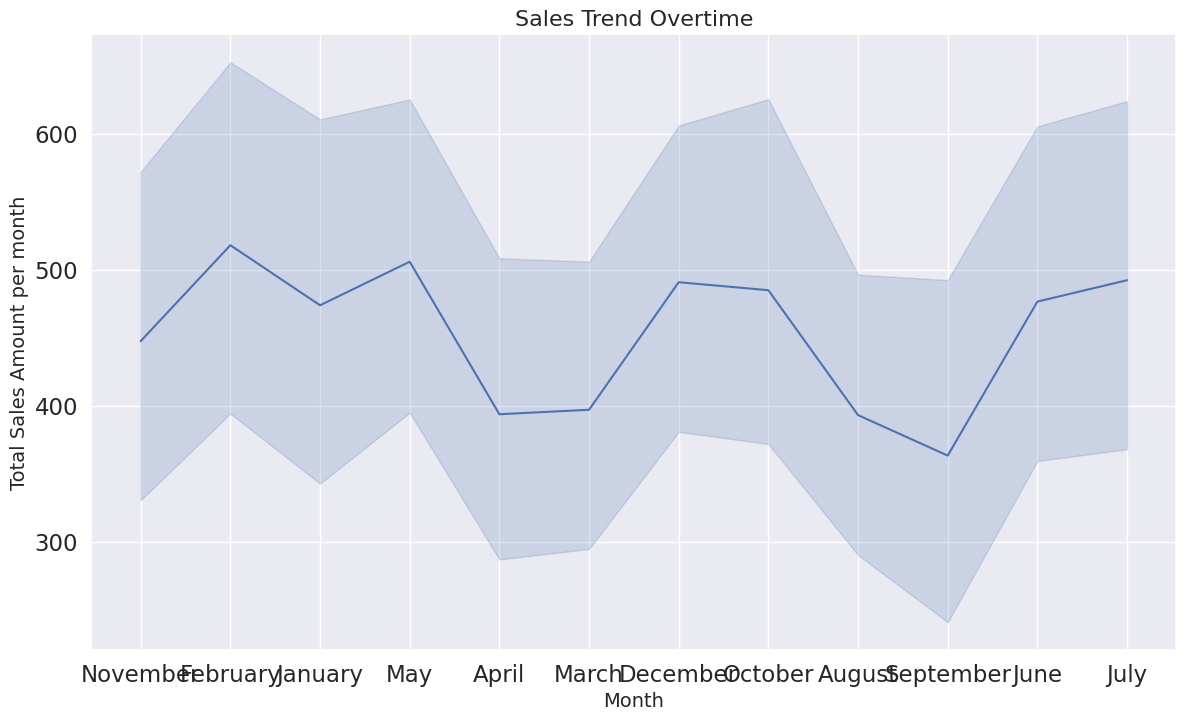

In [49]:
# Sales trends Overtime
plt.figure(figsize=(14,8))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()

In [50]:
# def style_palette(figsize=(14, 8), xlabel='', ylabel='', fontsize=14, color_gradient=None):
#     # Set the figure size
#     plt.figure(figsize=figsize)
    
#     # Set the axis labels and font size
#     plt.xlabel(xlabel, fontsize=fontsize)
#     plt.ylabel(ylabel, fontsize=fontsize)
    
#     # Set the tick label font size
#     plt.tick_params(axis='both', which='major', labelsize=fontsize)
    
#     # Apply the color gradient if provided
#     if color_gradient is not None:
#         # Create a color map from the gradient
#         cmap = plt.get_cmap('viridis', len(color_gradient))
#         # Set the color of the plot
#         plt.gca().set_prop_cycle(color=cmap(np.linspace(0, 1, len(color_gradient))))
        
        
# x = np.linspace(0, 10, 100)
# y = np.sin(x)

# # Apply the style to the plot
# style_palette(figsize=(14, 8), xlabel='X-axis', ylabel='Y-axis', fontsize=14, color_gradient=['red', 'green', 'blue'])

# # Plot the data
# plt.plot(x, y)
# plt.show()

- **Transaction frequency over a year**

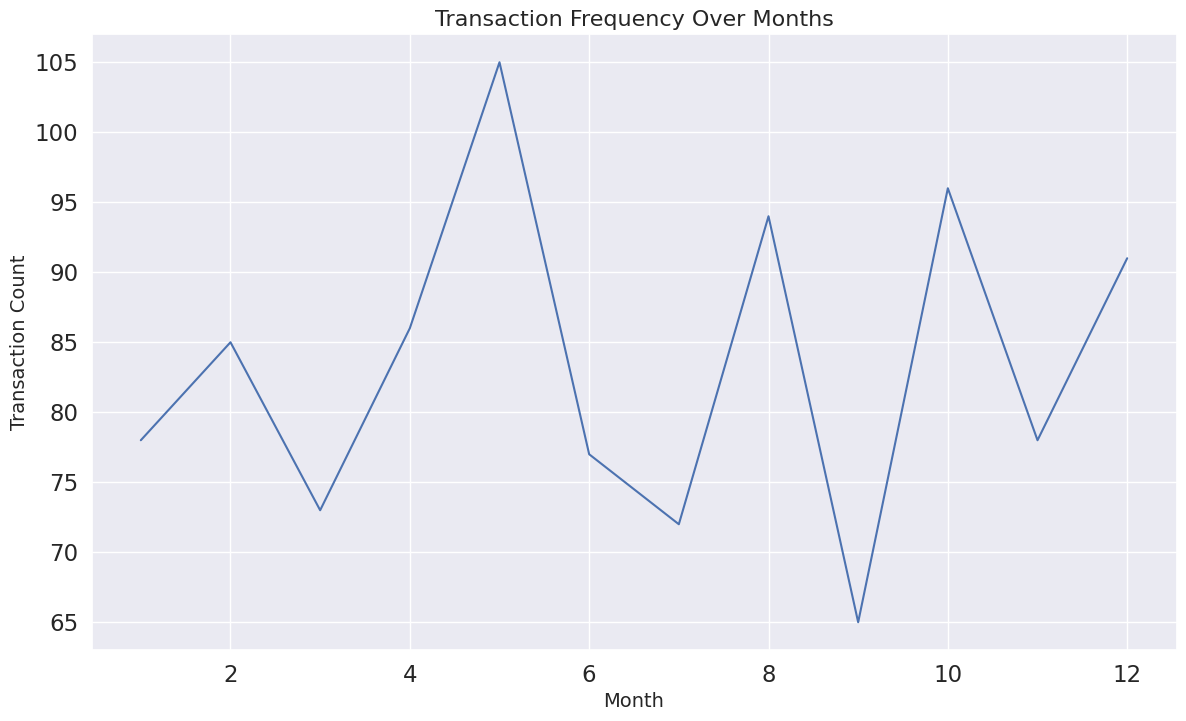

In [51]:
# transaction frequency over months

df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(14,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

- **Transaction frequency over each month**

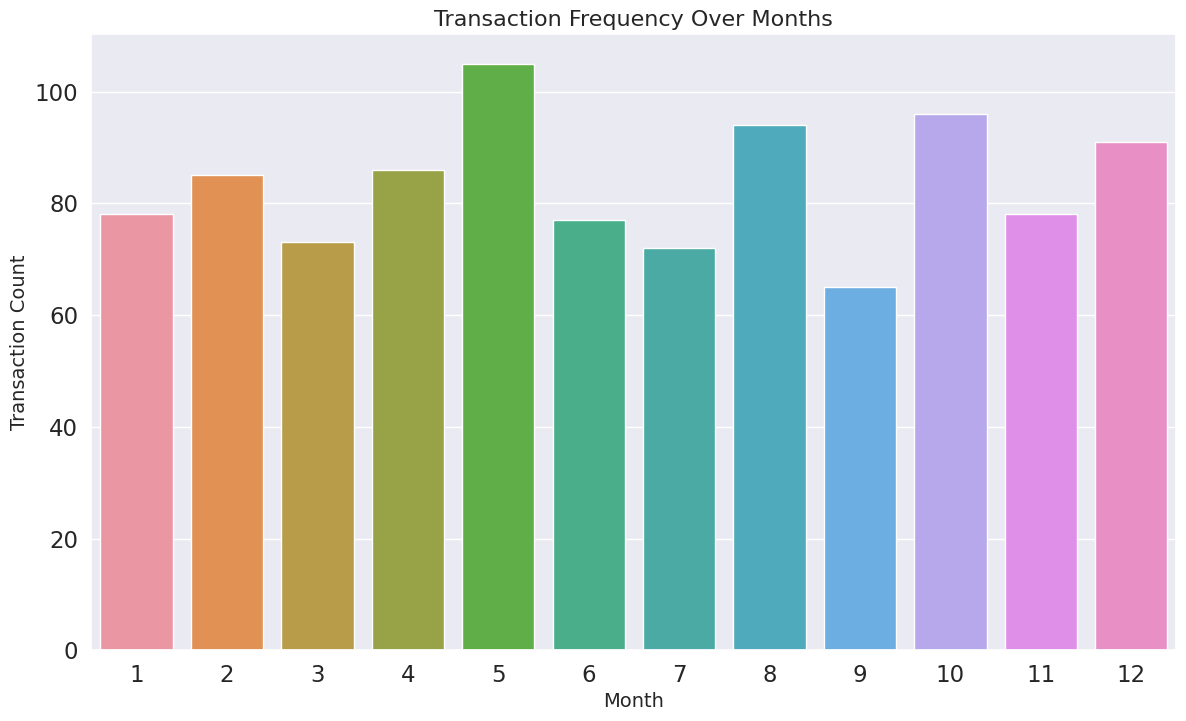

In [52]:
# bar blot
plt.figure(figsize=(14,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

## __Observation 2__

By observing the above charts:

- Next year will sales increase and company get in profit

- Month **_may_** sale was high. There must be Spring season and people buy cloth during this season.

- ##### Sale of product category per month

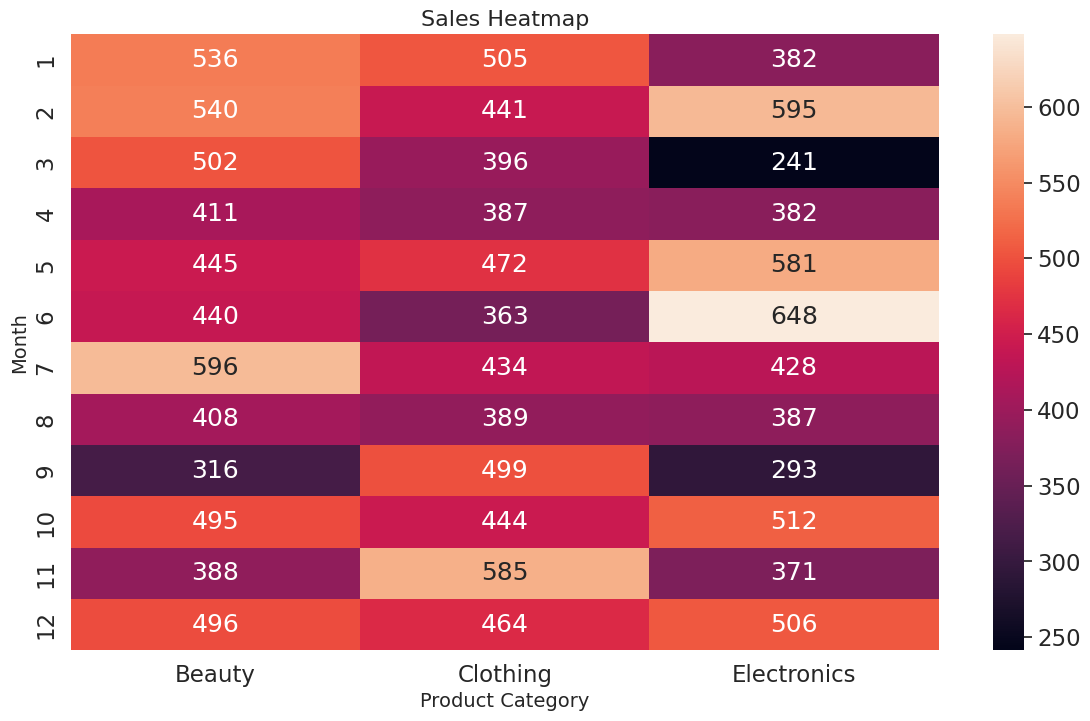

In [53]:
# Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

In [54]:
# binning Age 
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


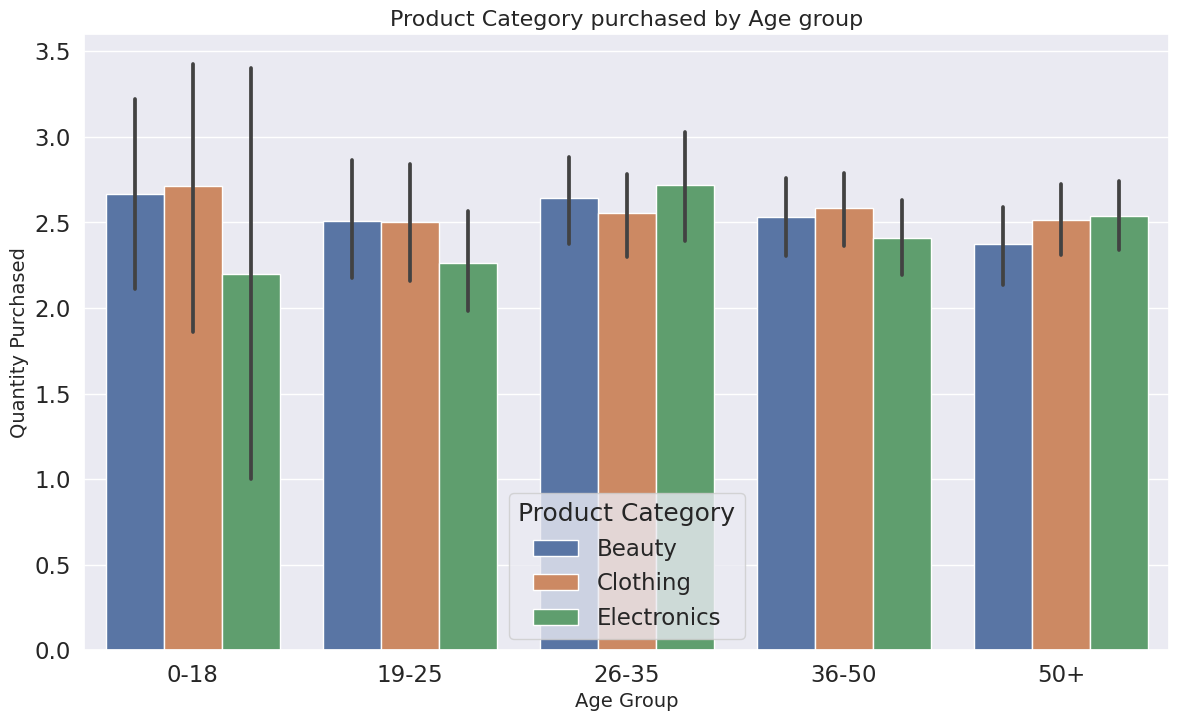

In [55]:
# bar plot 
plt.figure(figsize=(14,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=df)
plt.title('Product Category purchased by Age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Quantity Purchased', fontsize=14)
plt.show()

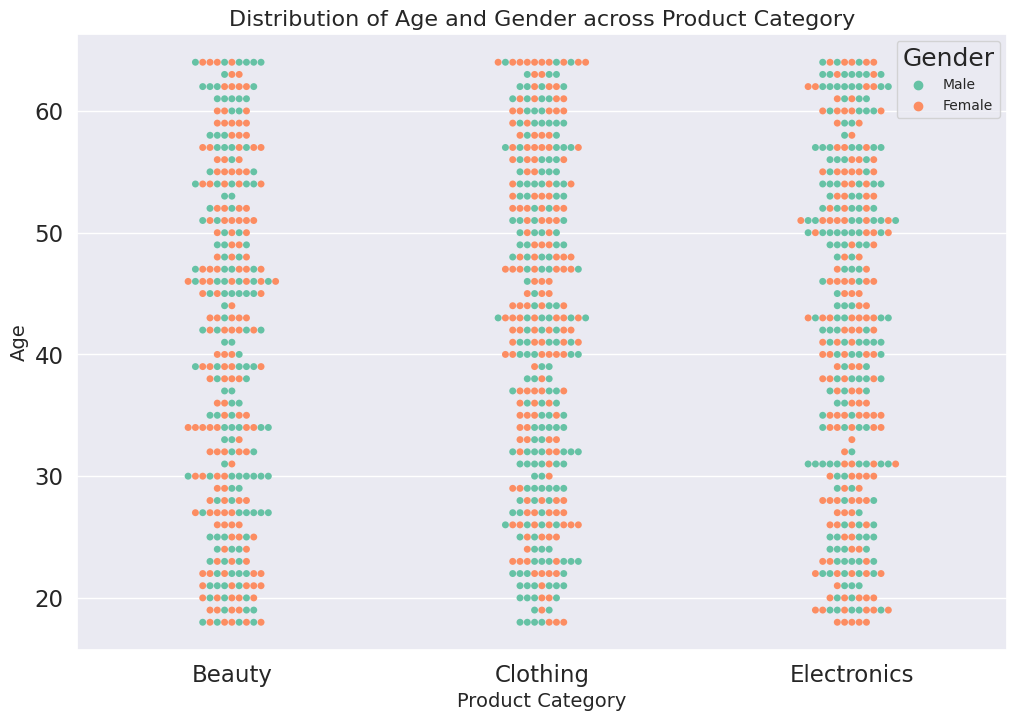

In [56]:
# Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(12,8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc ='upper right', fontsize=10)
plt.show()

In [57]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'Age Group'],
      dtype='object')

In [58]:
print(df[['Month', 'Total Amount']])

     Month  Total Amount
0       11           150
1        2          1000
2        1            30
3        5           500
4        5           100
..     ...           ...
995      5            50
996     11            90
997     10           100
998     12           150
999      4           120

[1000 rows x 2 columns]


In [59]:
# Revenue over the year
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()
print(monthly_totals)

    Month  Total Amount
0       1         36980
1       2         44060
2       3         28990
3       4         33870
4       5         53150
5       6         36715
6       7         35465
7       8         36960
8       9         23620
9      10         46580
10     11         34920
11     12         44690


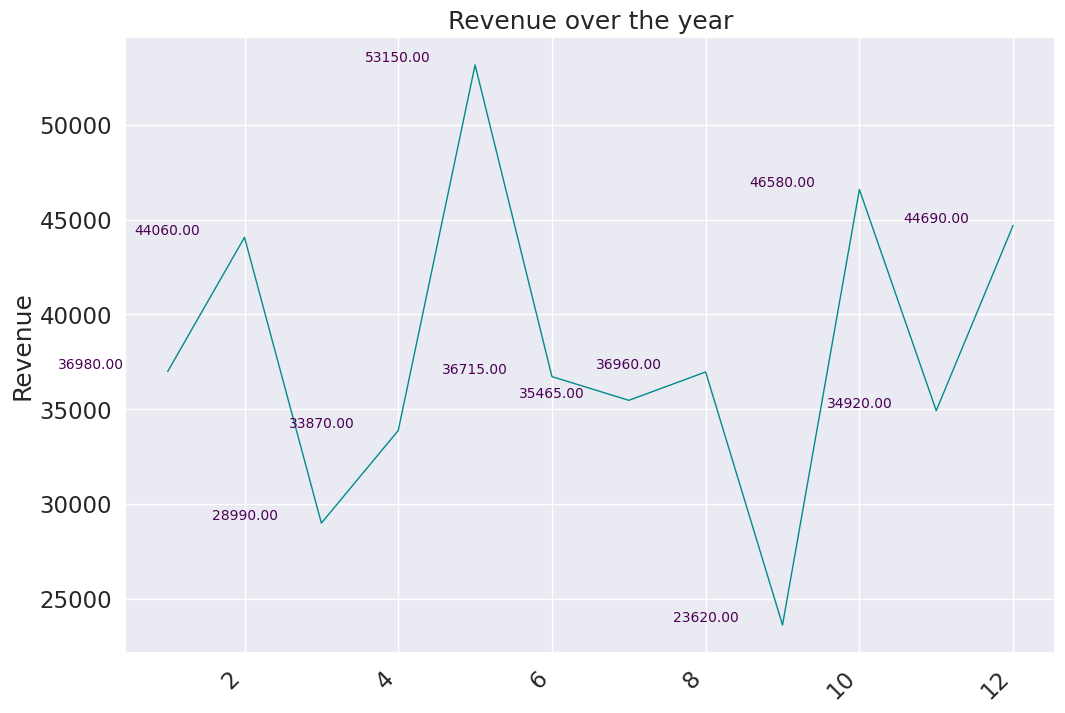

In [60]:
# Revenue over the year

# Create the monthly totals DataFrame
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_totals, color='#008B8B', linewidth=1)

# Add labels and title
plt.title('Revenue over the year')
plt.xlabel('')
plt.ylabel('Revenue')

# Add data labels
for i, total in enumerate(monthly_totals['Total Amount']):
    plt.text(i, total, f"{total:.2f}", va='bottom', ha='center', color='#4B0055', fontsize=10)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [61]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'Age Group'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

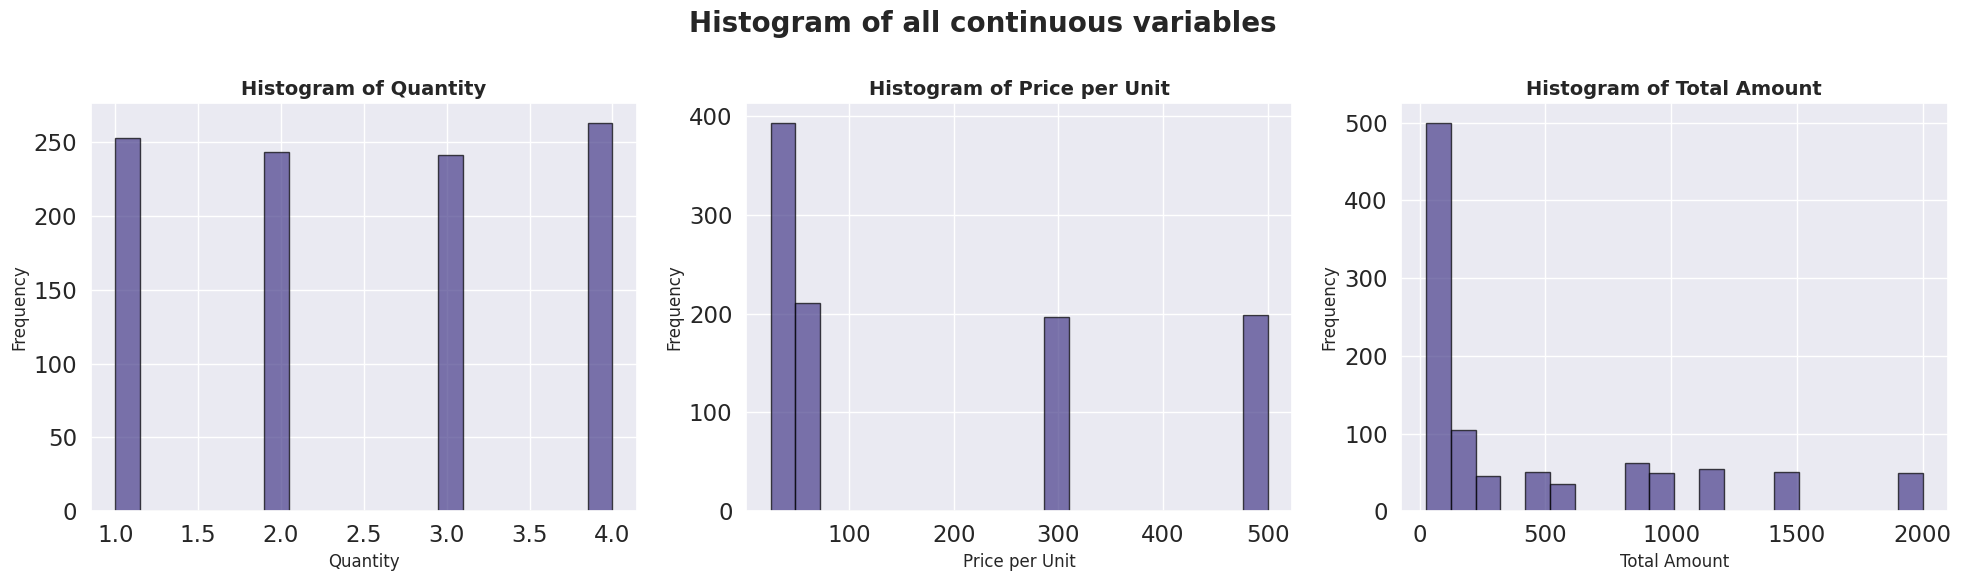

In [62]:
# frequency of the continues variables
df_ = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]

# Create the histogram plot
plt.figure(figsize=(12, 8))

# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(df_['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(df_['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(df_['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

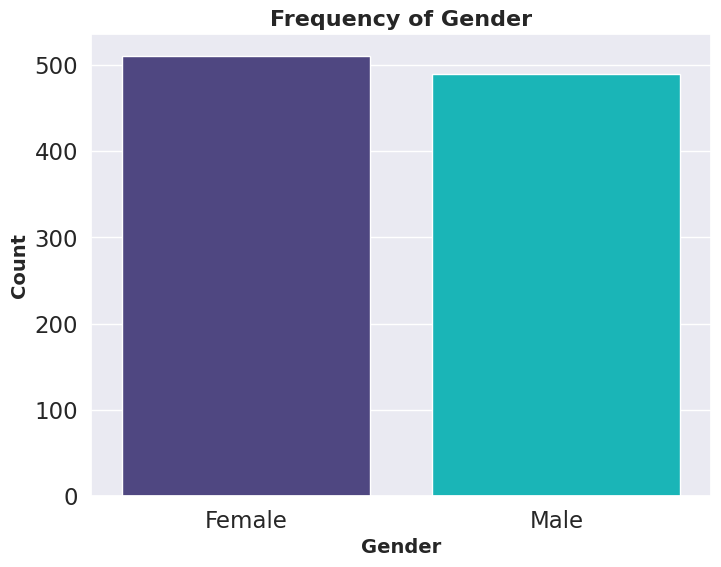

In [63]:
# frequency of gender - barplot
gender_counts = df['Gender'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['#483D8B', '#00CED1'])

# Add labels and title
plt.title('Frequency of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.show()

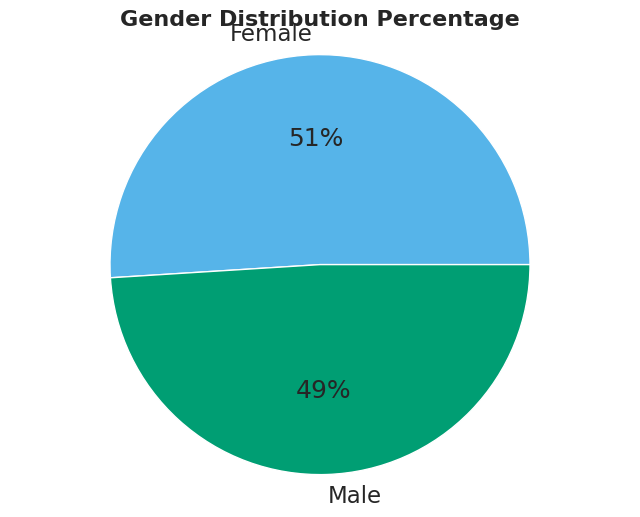

In [64]:
# Gender Distribution Percentage 
gender_counts = df['Gender'].value_counts()

# Calculate the gender distribution percentage
gender_dist = (gender_counts / gender_counts.sum()) * 100
gender_dist = gender_dist.reset_index()
gender_dist.columns = ['Gender', 'Percentage']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_dist['Percentage'], labels=gender_dist['Gender'], autopct='%.0f%%', colors=['#56b4e9', '#009e73'])

# Add a title and make the plot circular
plt.title('Gender Distribution Percentage', fontsize=16, fontweight='bold')
plt.axis('equal')

# Display the plot
plt.show()

In [65]:
cate_counts = df['Product Category'].value_counts()
cate_counts

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [66]:
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']
cate_dist

,Product Category,Percentage
0,Clothing,35.1
1,Electronics,34.2
2,Beauty,30.7


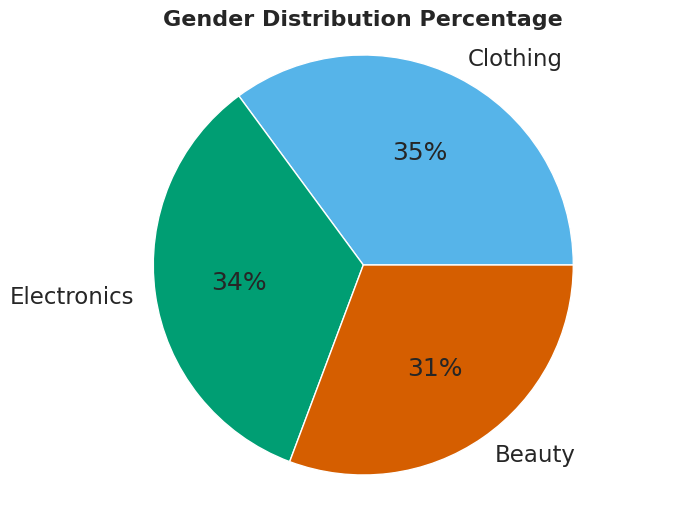

In [67]:
cate_counts = df['Product Category'].value_counts()

# Calculate the gender distribution percentage
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cate_dist['Percentage'], labels=cate_dist['Product Category'], autopct='%.0f%%', colors=['#56b4e9', '#009e73','#d55e00'])

# Add a title and make the plot circular
plt.title('Gender Distribution Percentage', fontsize=16, fontweight='bold')
plt.axis('equal')

# Display the plot
plt.show()

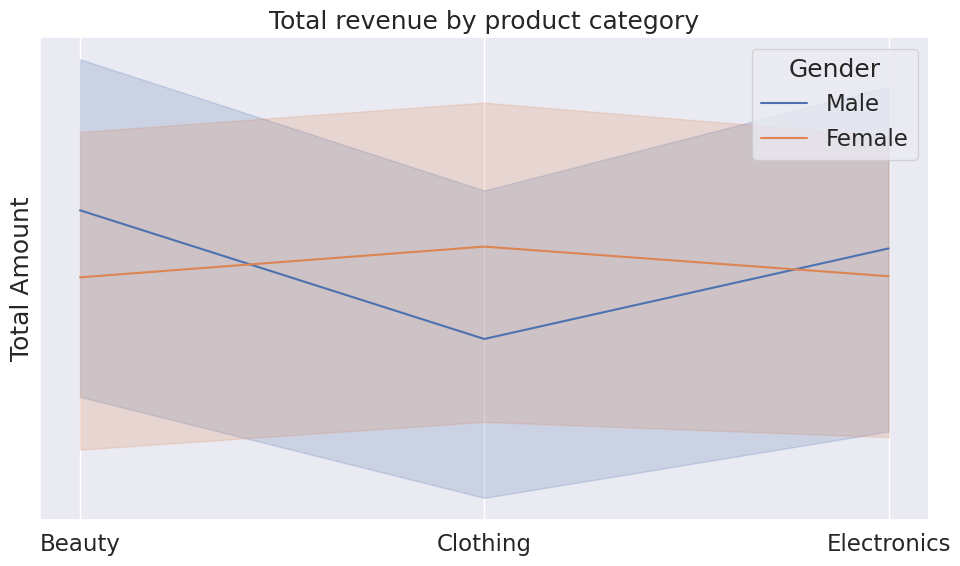

In [68]:

plt.figure(figsize=(10, 6))
sns.lineplot(x="Product Category", y="Total Amount", hue="Gender", data=df)

# Customize the plot
plt.title("Total revenue by product category")
plt.xlabel("")
# plt.ylabel("Total revenue")
plt.yscale("symlog")
plt.tight_layout()

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ","), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), 
                      textcoords='offset points', fontsize=10, fontweight='bold')

plt.show()

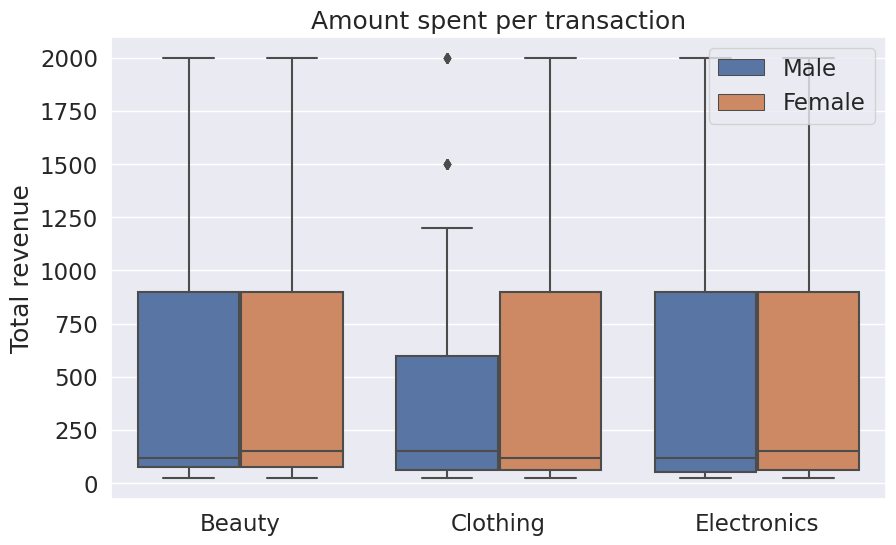

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product Category", y="Total Amount", hue="Gender", data=df)

# Customize the plot
plt.title("Amount spent per transaction")
plt.xlabel("")
plt.ylabel("Total revenue")
plt.legend(loc='upper right')
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Age Group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 75.5+ KB


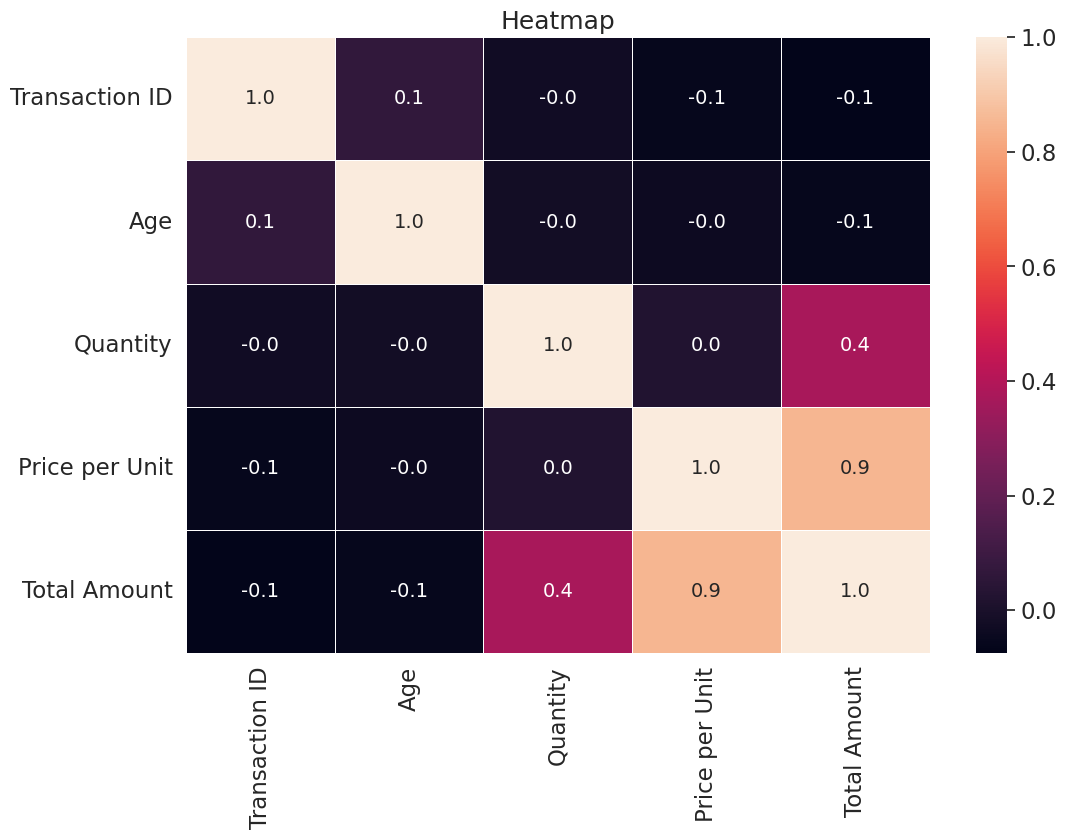

In [71]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (12,8))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14},fmt='.1f', linewidths=.5)

# __Overall obervsed__

While clothing is the best-selling category in terms of quantity, electronics generates the most revenue, closely followed by clothing.

**Clothing:** This category generates the most revenue for women. Men purchase more than women in terms of quantity but spend less on average in this category.

**Electronic:** This categoty men buy less than women in terms of quantity, but spend more on average in this category.

**Beauty:** This is the category with the lowest revenue and the lowest sales. In this category, revenue is higher for women than for men.

---

### Thanks for time to see this notebook. I really appericate it
### And please do upvote and feedback.